In [57]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder


In [58]:
data = pd.read_csv("cardekho.csv")

In [59]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


DATA HANDLING AND CLEANING


In [60]:
data.isnull().sum() # for checking missing data (na)

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [61]:
print(data.isnull().values.any())## missing value


True


In [62]:
print(data.isnull().sum().sum())



878


In [63]:
print(data[data.isnull().any(axis=1)])


                                      name  year  selling_price  km_driven  \
13                    Maruti Swift 1.3 VXi  2007         200000      80000   
31                      Fiat Palio 1.2 ELX  2003          70000      50000   
78                         Tata Indica DLS  2003          50000      70000   
87             Maruti Swift VDI BSIV W ABS  2015         475000      78000   
119                  Maruti Swift VDI BSIV  2010         300000     120000   
...                                    ...   ...            ...        ...   
7846                Toyota Qualis Fleet A3  2000         200000     100000   
7996             Hyundai Santro LS zipPlus  2000         140000      50000   
8009  Hyundai Santro Xing XS eRLX Euro III  2006         145000      80000   
8068             Ford Figo Aspire Facelift  2017         580000     165000   
8103                  Maruti Swift 1.3 VXi  2006         130000     100000   

        fuel seller_type transmission         owner  mileage(km

In [64]:
data.dropna(inplace=True)

In [65]:
print(data.isnull().values.any()) ## now missing data handle

False


now check duplicate data


In [66]:
# Total duplicate rows count
print(data.duplicated().sum())

1189


In [67]:
print(data.duplicated()) ## show all row jisme data duplicate hai

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 7907, dtype: bool


In [68]:
data = data.drop_duplicates()

In [69]:
print(data.duplicated().sum())

0


In [70]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [71]:
data = data.drop(columns=["seller_type"])

In [72]:
data

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6718 non-null   object 
 1   year                6718 non-null   int64  
 2   selling_price       6718 non-null   int64  
 3   km_driven           6718 non-null   int64  
 4   fuel                6718 non-null   object 
 5   transmission        6718 non-null   object 
 6   owner               6718 non-null   object 
 7   mileage(km/ltr/kg)  6718 non-null   float64
 8   engine              6718 non-null   float64
 9   max_power           6718 non-null   object 
 10  seats               6718 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 629.8+ KB


In [74]:
data["max_power"] = data["max_power"].str.extract(r"(\d+\.?\d*)").astype(float) #Ye numbers ko text me se extract karne ke liye use hota hai


In [75]:
data

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [76]:
data["brand"] = data["name"].str.split().str[0]


In [77]:
data["brand"]

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8121     Maruti
8122    Hyundai
8123    Hyundai
8124    Hyundai
8125     Maruti
Name: brand, Length: 6718, dtype: object

In [78]:
data = data.drop("name", axis=1)


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6718 non-null   int64  
 1   selling_price       6718 non-null   int64  
 2   km_driven           6718 non-null   int64  
 3   fuel                6718 non-null   object 
 4   transmission        6718 non-null   object 
 5   owner               6718 non-null   object 
 6   mileage(km/ltr/kg)  6718 non-null   float64
 7   engine              6718 non-null   float64
 8   max_power           6717 non-null   float64
 9   seats               6718 non-null   float64
 10  brand               6718 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 629.8+ KB


In [80]:
data

,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Manual,Second Owner,18.90,998.0,67.10,5.0,Maruti
8122,2014,475000,80000,Diesel,Manual,Second Owner,22.54,1396.0,88.73,5.0,Hyundai
8123,2013,320000,110000,Petrol,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai
8124,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai


In [81]:
categorical_col = ["brand","owner","transmission","fuel"]   # conver in numeric data  using fit_transform method
le = LabelEncoder()

for col  in categorical_col:
    data[col] = le.fit_transform(data[col])      

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6718 non-null   int64  
 1   selling_price       6718 non-null   int64  
 2   km_driven           6718 non-null   int64  
 3   fuel                6718 non-null   int64  
 4   transmission        6718 non-null   int64  
 5   owner               6718 non-null   int64  
 6   mileage(km/ltr/kg)  6718 non-null   float64
 7   engine              6718 non-null   float64
 8   max_power           6717 non-null   float64
 9   seats               6718 non-null   float64
 10  brand               6718 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 629.8 KB


In [83]:
print(data.isnull().any())

year                  False
selling_price         False
km_driven             False
fuel                  False
transmission          False
owner                 False
mileage(km/ltr/kg)    False
engine                False
max_power              True
seats                 False
brand                 False
dtype: bool


In [84]:
print(data[data.isnull().any(axis=1)])

      year  selling_price  km_driven  fuel  transmission  owner  \
4933  2000          80000     100000     0             1      2   

      mileage(km/ltr/kg)  engine  max_power  seats  brand  
4933                10.9   796.0        NaN    8.0     20  


In [85]:
# Remove rows with missing max_power
data = data.dropna(subset=["max_power"])

In [86]:
print(data.isnull().any())

year                  False
selling_price         False
km_driven             False
fuel                  False
transmission          False
owner                 False
mileage(km/ltr/kg)    False
engine                False
max_power             False
seats                 False
brand                 False
dtype: bool


In [87]:
data["Car_year"] = 2025 - data["year"]
data.drop("year",axis=1,inplace = True)

C:\Users\Saurabh Maurya\AppData\Local\Temp\ipykernel_16172\3559713549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Car_year"] = 2025 - data["year"]
C:\Users\Saurabh Maurya\AppData\Local\Temp\ipykernel_16172\3559713549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("year",axis=1,inplace = True)


In [88]:
data

,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,Car_year
0,450000,145500,1,1,0,23.40,1248.0,74.00,5.0,20,11
1,370000,120000,1,1,2,21.14,1498.0,103.52,5.0,26,11
2,158000,140000,3,1,4,17.70,1497.0,78.00,5.0,10,19
3,225000,127000,1,1,0,23.00,1396.0,90.00,5.0,11,15
4,130000,120000,3,1,0,16.10,1298.0,88.20,5.0,20,18
...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,3,1,2,18.90,998.0,67.10,5.0,20,12
8122,475000,80000,1,1,2,22.54,1396.0,88.73,5.0,11,11
8123,320000,110000,3,1,0,18.50,1197.0,82.85,5.0,11,12
8124,135000,119000,1,1,1,16.80,1493.0,110.00,5.0,11,18


In [89]:
import numpy as np

In [109]:
x = data.drop("selling_price",axis=1) # feature set
# y = data["selling_price"] # target set
y = np.log1p(data["selling_price"])  #Ye selling_price column ke har value me 1 add karke ln nikal dega.
#target variable ko normalize/scale karne ke liye ya skewed distribution ko reduce karne ke liye

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [93]:
model = LinearRegression()

In [94]:
# poly = PolynomialFeatures(degree=2, include_bias=False)
# x_train_poly = poly.fit_transform(x_train)
# x_test_poly = poly.transform(x_test)

In [95]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
y_pred = model.predict(x_test)



In [97]:
from sklearn.metrics import r2_score,mean_squared_error

In [98]:
print("R2 Score:",r2_score(y_test,y_pred))
print("RMSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8442649614548965
RMSE: 0.0911120411140024


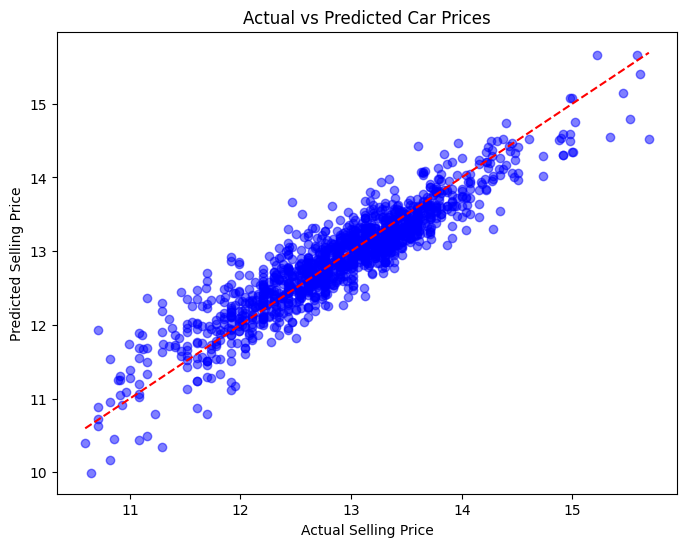

In [99]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(x_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()


In [100]:
x_test

,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,Car_year
6828,100000,1,1,0,12.99,2494.0,100.60,8.0,28,12
232,140000,3,1,0,20.51,998.0,67.04,5.0,20,9
6843,77500,1,1,2,14.00,2179.0,138.10,7.0,27,11
3175,9000,3,1,0,19.10,1197.0,85.80,5.0,20,7
4509,15000,3,1,0,25.17,799.0,53.30,5.0,25,6
...,...,...,...,...,...,...,...,...,...,...
4599,120000,3,1,2,17.40,1497.0,117.30,5.0,10,10
3026,110000,3,1,2,17.70,1497.0,78.00,5.0,10,17
2423,70000,3,1,2,17.70,1497.0,78.00,5.0,10,19
4838,130000,1,1,0,25.32,1198.0,77.00,6.0,19,9


In [101]:
y_test

6828    13.592368
232     12.765691
6843    13.199326
3175    13.322854
4509    12.765691
          ...    
4599    13.171155
3026    11.561725
2423    12.506181
4838    12.899222
2075    12.765691
Name: selling_price, Length: 1344, dtype: float64

In [102]:
y_pred

array([13.28234933, 12.78475932, 13.5757281 , ..., 11.82695594,
       13.14805657, 13.26644484])

In [103]:
input = pd.DataFrame([[120000,1,1,2,19.67,1582.0,126.20,5.0,11,10]],columns=["km_driven","fuel","transmission","owner","mileage(km/ltr/kg)","engine","max_power","seats","brand","Car_year"])

In [104]:

prediction = model.predict(input)
# Inverse transform
actual_price = np.expm1(prediction[0])   # exp(pred) - 1 kqa use real predict data ko dena
print("Predicted Selling Price:", round(actual_price, 2))


Predicted Selling Price: 680698.95


In [105]:
import pickle as pk

In [106]:
pk.dump(model,open("car_price_prediction.pkl","wb"))

In [107]:
data.to_csv("cleaned_data.csv")

In [110]:
data

,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,Car_year
0,450000,145500,1,1,0,23.40,1248.0,74.00,5.0,20,11
1,370000,120000,1,1,2,21.14,1498.0,103.52,5.0,26,11
2,158000,140000,3,1,4,17.70,1497.0,78.00,5.0,10,19
3,225000,127000,1,1,0,23.00,1396.0,90.00,5.0,11,15
4,130000,120000,3,1,0,16.10,1298.0,88.20,5.0,20,18
...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,3,1,2,18.90,998.0,67.10,5.0,20,12
8122,475000,80000,1,1,2,22.54,1396.0,88.73,5.0,11,11
8123,320000,110000,3,1,0,18.50,1197.0,82.85,5.0,11,12
8124,135000,119000,1,1,1,16.80,1493.0,110.00,5.0,11,18


In [111]:
data = data.drop(columns=["selling_price"])

In [112]:
data

,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,Car_year
0,145500,1,1,0,23.40,1248.0,74.00,5.0,20,11
1,120000,1,1,2,21.14,1498.0,103.52,5.0,26,11
2,140000,3,1,4,17.70,1497.0,78.00,5.0,10,19
3,127000,1,1,0,23.00,1396.0,90.00,5.0,11,15
4,120000,3,1,0,16.10,1298.0,88.20,5.0,20,18
...,...,...,...,...,...,...,...,...,...,...
8121,50000,3,1,2,18.90,998.0,67.10,5.0,20,12
8122,80000,1,1,2,22.54,1396.0,88.73,5.0,11,11
8123,110000,3,1,0,18.50,1197.0,82.85,5.0,11,12
8124,119000,1,1,1,16.80,1493.0,110.00,5.0,11,18
